In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('MBB.csv')
df=df.reset_index()['Price']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 65ms/step - loss: 0.0474 - val_loss: 0.0043
Epoch 2/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0037 - val_loss: 0.0089
Epoch 3/100
12/12 [==============================] - 0s 31ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 4/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0010 - val_loss: 0.0027
Epoch 5/100
12/12 [==============================] - 0s 32ms/step - loss: 9.2552e-04 - val_loss: 0.0031
Epoch 6/100
12/12 [==============================] - 0s 32ms/step - loss: 8.0204e-04 - val_loss: 0.0025
Epoch 7/100
12/12 [==============================] - 0s 32ms/step - loss: 7.6373e-04 - val_loss: 0.0026
Epoch 8/100
12/12 [==============================] - 0s 32ms/step - loss: 7.4112e-04 - val_loss: 0.0024
Epoch 9/100
12/12 [==============================] - 0s 31ms/step - loss: 7.0937e-04 - val_loss: 0.0023
Epoch 10/100
12/12 [==============================] - 0s 32ms/step - loss: 6.742

Epoch 79/100
12/12 [==============================] - 0s 32ms/step - loss: 2.7147e-04 - val_loss: 9.1670e-04
Epoch 80/100
12/12 [==============================] - 0s 32ms/step - loss: 2.5080e-04 - val_loss: 9.4570e-04
Epoch 81/100
12/12 [==============================] - 0s 36ms/step - loss: 2.5667e-04 - val_loss: 9.9383e-04
Epoch 82/100
12/12 [==============================] - 0s 33ms/step - loss: 2.9204e-04 - val_loss: 9.0711e-04
Epoch 83/100
12/12 [==============================] - 0s 31ms/step - loss: 2.7763e-04 - val_loss: 9.1601e-04
Epoch 84/100
12/12 [==============================] - 0s 31ms/step - loss: 3.1548e-04 - val_loss: 0.0013
Epoch 85/100
12/12 [==============================] - 0s 29ms/step - loss: 3.7594e-04 - val_loss: 0.0010
Epoch 86/100
12/12 [==============================] - 0s 32ms/step - loss: 2.9399e-04 - val_loss: 9.6707e-04
Epoch 87/100
12/12 [==============================] - 0s 31ms/step - loss: 2.4877e-04 - val_loss: 8.5544e-04
Epoch 88/100
12/12 [=======

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 42ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
train_size1 = int(0.7 * len(df))
test_size1 = int(0.2 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1)

In [13]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val1)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 1154.5805695156212
Testing RMSE: 4217.377569950448
Validation MAPE: 4.867978551286542
Testing MAPE: 14.730037483488026
Validation MAE: 833.08209765625
Testing MAE: 3373.6940558052856


In [14]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[len(val_data)-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<30):

    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.48897256 0.50295199 0.49130246 0.44703426 0.46800341 0.47732303
 0.47499313 0.4610137  0.50295199 0.50062208 0.51227161 0.51460152
 0.51460152 0.51227161 0.51460152 0.51460152 0.51460152 0.52625104
 0.56818934 0.57517905 0.57750896 0.58216877 0.56119962 0.57517905
 0.54489028 0.54722019 0.53091085 0.53557066 0.51926133 0.52159123
 0.52392114 0.51693142 0.50295199 0.49596227 0.50295199 0.51460152
 0.5076118  0.54489028 0.53091085 0.51460152 0.50994171 0.48897256
 0.46800341 0.46800341 0.48664265 0.47499313 0.4633436  0.47033332
 0.47499313 0.48431275 0.49363237 0.49130246 0.47965294 0.46567351
 0.49363237 0.47732303 0.47732303 0.47033332 0.47266322 0.47499313
 0.47499313 0.49130246 0.50062208 0.50295199 0.51693142 0.51460152
 0.51460152 0.53557066 0.53790057 0.54023047 0.52625104 0.53091085
 0.53091085 0.53790057 0.53557066 0.52858095 0.51693142 0.51460152
 0.50994171 0.5076118  0.50994171 0.5052819  0.51460152 0.51460152
 0.51926133 0.52159123 0.52392114 0.51227161 0.507

7 day output [[0.5932634]]
8 day input [0.50295199 0.50062208 0.51227161 0.51460152 0.51460152 0.51227161
 0.51460152 0.51460152 0.51460152 0.52625104 0.56818934 0.57517905
 0.57750896 0.58216877 0.56119962 0.57517905 0.54489028 0.54722019
 0.53091085 0.53557066 0.51926133 0.52159123 0.52392114 0.51693142
 0.50295199 0.49596227 0.50295199 0.51460152 0.5076118  0.54489028
 0.53091085 0.51460152 0.50994171 0.48897256 0.46800341 0.46800341
 0.48664265 0.47499313 0.4633436  0.47033332 0.47499313 0.48431275
 0.49363237 0.49130246 0.47965294 0.46567351 0.49363237 0.47732303
 0.47732303 0.47033332 0.47266322 0.47499313 0.47499313 0.49130246
 0.50062208 0.50295199 0.51693142 0.51460152 0.51460152 0.53557066
 0.53790057 0.54023047 0.52625104 0.53091085 0.53091085 0.53790057
 0.53557066 0.52858095 0.51693142 0.51460152 0.50994171 0.5076118
 0.50994171 0.5052819  0.51460152 0.51460152 0.51926133 0.52159123
 0.52392114 0.51227161 0.5076118  0.51460152 0.51693142 0.52625104
 0.52625104 0.53324076 0

17 day output [[0.66431236]]
18 day input [0.56818934 0.57517905 0.57750896 0.58216877 0.56119962 0.57517905
 0.54489028 0.54722019 0.53091085 0.53557066 0.51926133 0.52159123
 0.52392114 0.51693142 0.50295199 0.49596227 0.50295199 0.51460152
 0.5076118  0.54489028 0.53091085 0.51460152 0.50994171 0.48897256
 0.46800341 0.46800341 0.48664265 0.47499313 0.4633436  0.47033332
 0.47499313 0.48431275 0.49363237 0.49130246 0.47965294 0.46567351
 0.49363237 0.47732303 0.47732303 0.47033332 0.47266322 0.47499313
 0.47499313 0.49130246 0.50062208 0.50295199 0.51693142 0.51460152
 0.51460152 0.53557066 0.53790057 0.54023047 0.52625104 0.53091085
 0.53091085 0.53790057 0.53557066 0.52858095 0.51693142 0.51460152
 0.50994171 0.5076118  0.50994171 0.5052819  0.51460152 0.51460152
 0.51926133 0.52159123 0.52392114 0.51227161 0.5076118  0.51460152
 0.51693142 0.52625104 0.52625104 0.53324076 0.54256038 0.54023047
 0.52392114 0.53091085 0.53324076 0.54075181 0.54701048 0.54902935
 0.55961174 0.568290

25 day output [[0.7186029]]
26 day input [0.53091085 0.53557066 0.51926133 0.52159123 0.52392114 0.51693142
 0.50295199 0.49596227 0.50295199 0.51460152 0.5076118  0.54489028
 0.53091085 0.51460152 0.50994171 0.48897256 0.46800341 0.46800341
 0.48664265 0.47499313 0.4633436  0.47033332 0.47499313 0.48431275
 0.49363237 0.49130246 0.47965294 0.46567351 0.49363237 0.47732303
 0.47732303 0.47033332 0.47266322 0.47499313 0.47499313 0.49130246
 0.50062208 0.50295199 0.51693142 0.51460152 0.51460152 0.53557066
 0.53790057 0.54023047 0.52625104 0.53091085 0.53091085 0.53790057
 0.53557066 0.52858095 0.51693142 0.51460152 0.50994171 0.5076118
 0.50994171 0.5052819  0.51460152 0.51460152 0.51926133 0.52159123
 0.52392114 0.51227161 0.5076118  0.51460152 0.51693142 0.52625104
 0.52625104 0.53324076 0.54256038 0.54023047 0.52392114 0.53091085
 0.53324076 0.54075181 0.54701048 0.54902935 0.55961174 0.56829041
 0.57476813 0.58462495 0.59326339 0.60038    0.60762167 0.61216301
 0.61880064 0.62640047

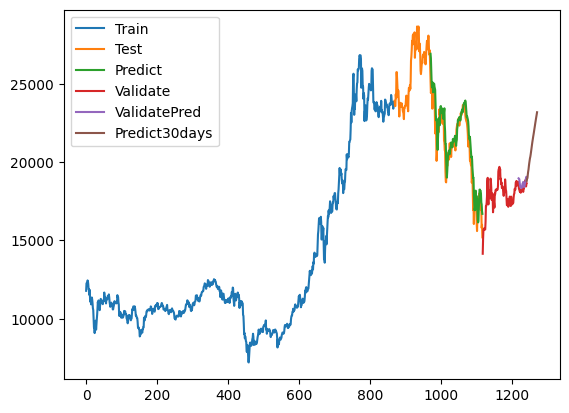

In [15]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()